In [63]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

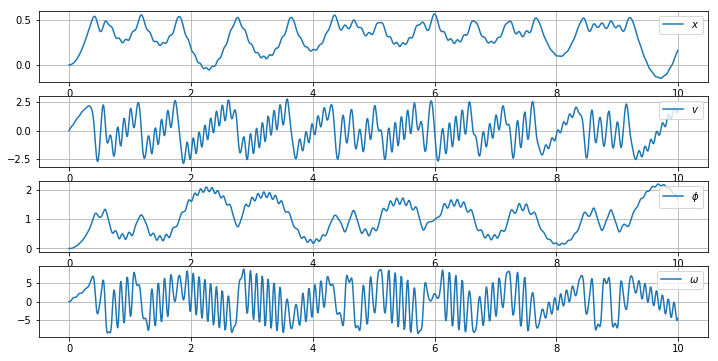

In [64]:
# Параметры
K = 500.0
I = 1.0
m = 10.0
l = 1.0
K1 = 8000.0
m1 = 10.0
n1 = 0.5
n2 = 1.0
g = 9.8

# Функия правых частей системы
def func(x, y):
    
    x, v, fi, omega = y
    
    BC = np.array([
        n2 - 2/3 * l * np.sin(fi),
        2/3 * l *(1 - np.cos(fi))
    ])
    ED = np.array([
        n1 - 1/3 * l * np.sin(fi),
        1/3 * l *(1 - np.cos(fi))
    ])
    
    OB = np.array([
        2/3 * l * np.sin(fi),
        2/3 * l * np.cos(fi)
    ])
    OD = np.array([
        -1/3 * l * np.sin(fi),
        -1/3 * l * np.cos(fi)
    ])
    
    BC_norm = np.sqrt(BC[0]**2 + BC[1]**2)
    ED_norm = np.sqrt(ED[0]**2 + ED[1]**2)
    
    dx = n1 - ED_norm  # Растяжение пружины для стержня
    dx_1 = n2 - BC_norm  # Растяжение пружины для блока
    F1 = m1 * g  # Сила тяжести для блока
    F2 =  - K1 * (x - dx_1)  # Сила упругости пружины для блока
    F3 = F2  # Сила силы натяжения нити
    F4 = m * g  # Сила тяжести для стержня
    F5 =  -K * dx  # Сила упругости пружины для стержня
    
    M3 = (OB[0]*BC[1] - OB[1]*BC[0]) / BC_norm * F3 # Момент силы натяжения нити
    M4 =  1/6 * l * F4 * np.sin(fi) # Момент силы тяжести стержня
    M5 = (OD[0]*ED[1] - OD[1]*ED[0]) / ED_norm * F5# Момент силы упругости пружины для стержня
    return np.array([
        y[1],
        (F1 + F2) / m1,
        y[3],
        (M3 + M4 + M5) / I
    ])
    
# Решатель системы ДУ методом Рунге-Кутты 4 порядка
def runge_kutta_45_solver(func, x0, x1, y0, h):
    n = int((x1 - x0) // h)
    vx = np.zeros(n + 1)
    vy = np.zeros([y0.size, n+1])
    vx[0] = x = x0
    vy[:, 0] = y = y0
    for i in range(1, n + 1):
        k1 = h * func(x, y)
        k2 = h * func(x + 0.5 * h, y + 0.5 * k1)
        k3 = h * func(x + 0.5 * h, y + 0.5 * k2)
        k4 = h * func(x + h, y + k3)
        vx[i] = x = x0 + i * h
        vy[:, i] = y = y + (k1 + k2 + k2 + k3 + k3 + k4) / 6
    return vx, vy
    
# Начальные условия
x0 = v0 = fi0 = omega0 = 0.0
y0 = np.array([x0, v0, fi0, omega0])
t_begin, t_end = 0, 10
step = 0.01

# Решаем систему уравнений
t, y = runge_kutta_4_solver(func, t_begin, t_end, y0, step)

# Строим графики
labels = ['$x$', '$v$', '$\phi$', '$\omega$']
fig, axes = plt.subplots(4,1)
fig.set_size_inches(12,6)
for i, ax in enumerate(axes):
    ax.plot(t,y[i], label=labels[i])
    ax.legend(loc='upper right')
    ax.grid()
fig.savefig('result' + str(hash(datetime.now())) + '.jpg')